In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.cluster import KMeans
import sklearn

In [2]:
sns.set()

In [3]:
df = pd.read_csv("train.csv", low_memory=False)

In [4]:
df = df.dropna()

In [5]:
# all cells below (till df.info(), cell 69) is dataset transformation numeric value columns from objects to their real types
df = df[df.Age.apply(lambda x: x.isnumeric())]
df['Age']=df['Age'].astype(int)
df = df[df.Age <= 100]
df = df[df.Age >= 18]

In [6]:
#dropping invalid data
df = df[df.SSN.str.contains('\d{3}-\d{2}-\d{4}', regex=True)]

In [7]:
#dropping invalid data
df = df[df.Payment_Behaviour.str.contains('(High|Low)_spent_(Small|Medium|Large)_value_payments', regex=True)]

C:\Users\andri\AppData\Local\Temp\ipykernel_6132\3358295300.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df.Payment_Behaviour.str.contains('(High|Low)_spent_(Small|Medium|Large)_value_payments', regex=True)]


In [8]:
#function for checking whether object is float type
def is_float(string):
    if string.replace(".", "").isnumeric():
        return True
    else:
        return False

In [9]:
#checking whether object is float type
df = df[df.Annual_Income.apply(lambda x: is_float(x))]
#converting object type to float
df['Annual_Income']=df['Annual_Income'].astype(float)

In [10]:
#checking whether object is int type
df = df[df.Num_of_Loan.apply(lambda x: x.isnumeric())]
#converting object type to int
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
#removing negative values for number of loans
df = df[df.Num_of_Loan >= 0]

In [11]:
df = df[df.Num_of_Delayed_Payment.apply(lambda x: x.isnumeric())]
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(int)

In [12]:
df = df[df.Changed_Credit_Limit.apply(lambda x: is_float(x))]
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [13]:
df = df[df.Outstanding_Debt.apply(lambda x: is_float(x))]
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

In [14]:
df = df[df.Amount_invested_monthly.apply(lambda x: is_float(x))]
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

In [15]:
df = df[df.Monthly_Balance.apply(lambda x: is_float(x))]
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)

In [16]:
#dropping duplicate SSNs
df = df.drop_duplicates(subset=['SSN'])

In [17]:
#DATASET AFTER CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10109 entries, 0 to 99994
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10109 non-null  object 
 1   Customer_ID               10109 non-null  object 
 2   Month                     10109 non-null  object 
 3   Name                      10109 non-null  object 
 4   Age                       10109 non-null  int32  
 5   SSN                       10109 non-null  object 
 6   Occupation                10109 non-null  object 
 7   Annual_Income             10109 non-null  float64
 8   Monthly_Inhand_Salary     10109 non-null  float64
 9   Num_Bank_Accounts         10109 non-null  int64  
 10  Num_Credit_Card           10109 non-null  int64  
 11  Interest_Rate             10109 non-null  int64  
 12  Num_of_Loan               10109 non-null  int32  
 13  Type_of_Loan              10109 non-null  object 
 14  Delay_

In [40]:
#DATASET AFTER CLEANING
pd.set_option('display.max_columns', None)
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.10,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,0,6,1.99,4.0,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.40,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
57,0x1657,CUS_0x5407,February,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",30,14,17.13,5.0,_,1704.18,35.171160,14 Years and 8 Months,Yes,70.478333,38.436983,High_spent_Large_value_payments,392.196185,Poor
68,0x1666,CUS_0x4157,May,Charlie Zhur,23,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,11.24,8.0,Good,1377.74,29.819187,21 Years and 8 Months,No,226.892792,649.809364,High_spent_Small_value_payments,367.684594,Standard
74,0x1670,CUS_0xba08,March,Jamesj,44,366-68-1681,Journalist,31370.80,2825.233333,1,6,12,2,"Not Specified, and Payday Loan",-2,0,1.76,5.0,Good,421.43,31.046418,26 Years and 7 Months,No,46.616129,140.820696,Low_spent_Medium_value_payments,375.086508,Good
81,0x167b,CUS_0xa66b,February,Saphirj,40,221-30-8554,Teacher,33751.27,2948.605833,5,5,20,3,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20,11.00,4.0,Standard,1328.93,30.908081,19 Years and 3 Months,Yes,65.008174,70.131078,High_spent_Large_value_payments,399.721331,Standard
88,0x1686,CUS_0xc0ab,January,Soyoungd,32,342-90-2649,Engineer,88640.24,7266.686667,3,6,1,2,"Payday Loan, and Payday Loan",-1,0,3.51,3.0,Good,950.36,28.210617,25 Years and 5 Months,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard


In [19]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [20]:
df.shape

(10109, 28)

In [21]:


# Chapter 2

# Credit score classification



<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

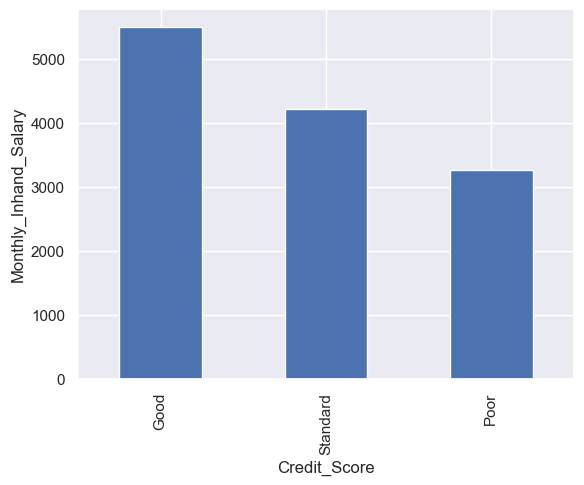

In [22]:
pdf = df.set_index('Credit_Score').groupby(['Credit_Score']).Monthly_Inhand_Salary.mean().sort_values(ascending=False)
pdf.plot(kind='bar', ylabel='Monthly_Inhand_Salary')

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

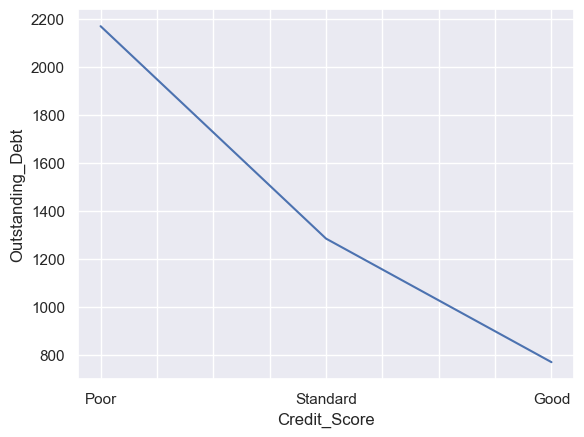

In [23]:
pdf = df.set_index('Credit_Score').groupby(['Credit_Score']).Outstanding_Debt.mean().sort_values(ascending=False)
pdf.plot(kind='line', ylabel='Outstanding_Debt')

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

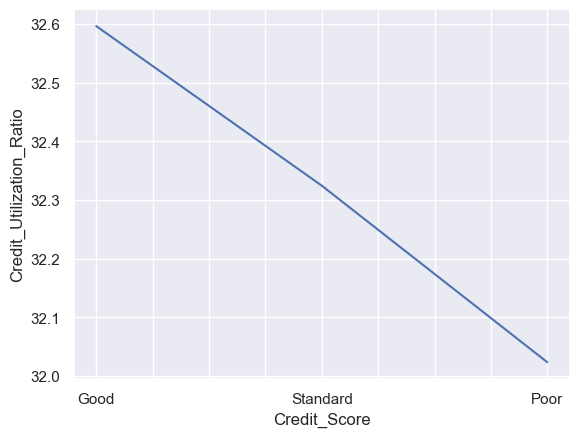

In [24]:
pdf = df.set_index('Credit_Score').groupby(['Credit_Score']).Credit_Utilization_Ratio.mean().sort_values(ascending=False)
pdf.plot(kind='line', ylabel='Credit_Utilization_Ratio')

<Axes: xlabel='Age', ylabel='Outstanding_Debt'>

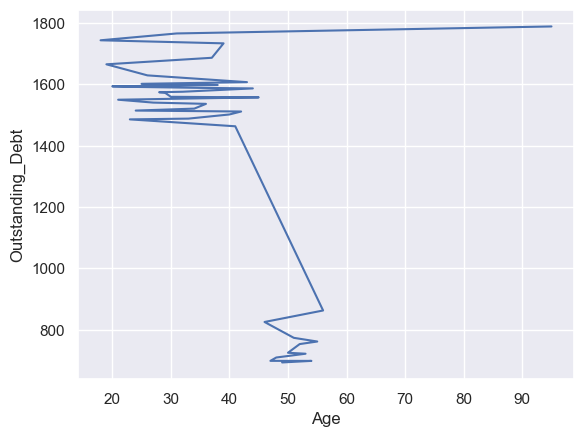

In [25]:
pdf = df.set_index('Age').groupby(['Age']).Outstanding_Debt.mean().sort_values(ascending=False)
pdf.plot(kind='line', ylabel='Outstanding_Debt')

<Axes: xlabel='Age', ylabel='Num_of_Loan'>

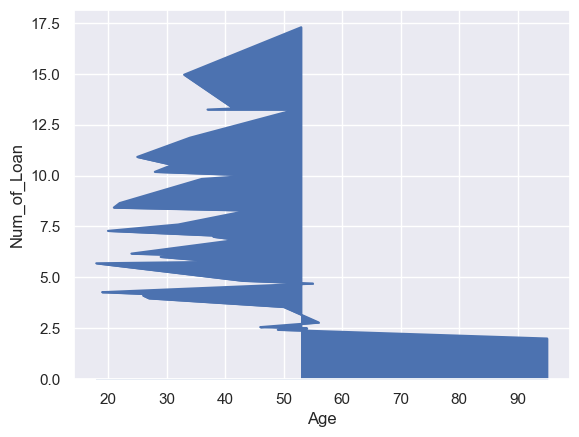

In [26]:
pdf = df.set_index('Age').groupby(['Age']).Num_of_Loan.mean().sort_values(ascending=False)
pdf.plot(kind='area', ylabel='Num_of_Loan')

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

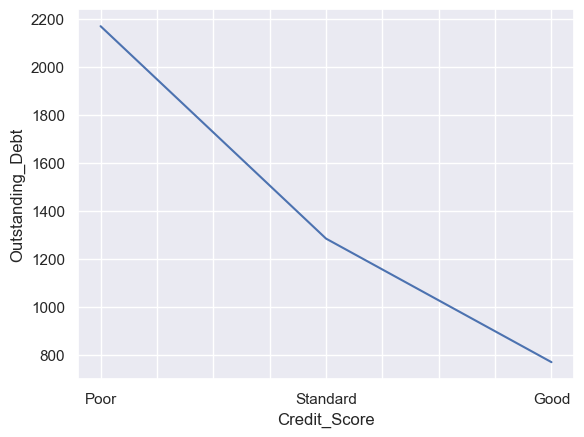

In [27]:
pdf = df.set_index('Credit_Score').groupby(['Credit_Score']).Outstanding_Debt.mean().sort_values(ascending=False)
pdf.plot(kind='line', ylabel='Outstanding_Debt')

In [28]:
#converting object types to categories, and then getting code of the category
df.dtypes
dfc = df.copy();
for col in dfc.columns:
    if(dfc[col].dtype == 'object'):
            dfc[col] = dfc[col].astype('category').cat.codes

In [29]:


# Chapter 3

# Unsupervised Analysis - Clustering



<Axes: xlabel='Number of Clusters'>

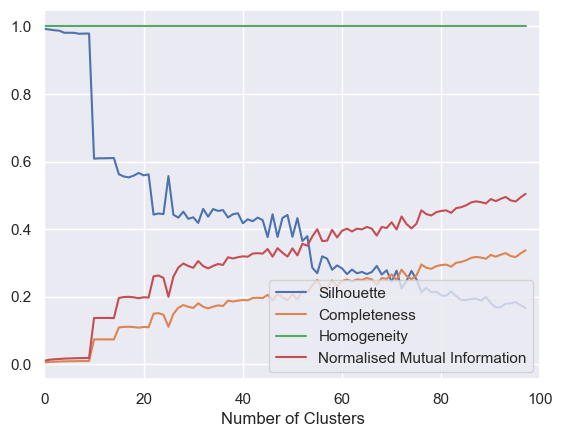

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Separating the dependent and independent variables 
y = dfc['ID'] 
dfx = dfc.drop('ID', axis=1)

#number of clusters for predicting
count = 98
#array for storing scores of predictions
arr = np.empty((4, count))

for x in range(count):
        # Building the clustering model, starts from 2 clusters
        kmeans = KMeans(n_clusters=x+2)

        # Training the clustering model 
        kmeans.fit(dfx) 

        # Storing the predicted Clustering labels 
        labels = kmeans.predict(dfx)
        arr[0][x] = metrics.silhouette_score(dfc, labels)
        arr[1][x] = metrics.homogeneity_score(y, labels)
        arr[2][x] = metrics.completeness_score(y, labels)
        arr[3][x] = metrics.normalized_mutual_info_score(y, labels)
              
    
d = {'Silhouette': arr[0], 'Completeness': arr[1], 'Homogeneity': arr[2], 'Normalised Mutual Information': arr[3]}

arrdf = pd.DataFrame(data=d)    
arrdf.plot(kind='line', xlabel='Number of Clusters', xlim=(0, count+2))

In [31]:


# Chapter 4

# Supervised Analysis - Regression



In [32]:
#dropping unnecessary columns for model training
train_df = dfc.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)

In [33]:
X = train_df.drop(['Credit_Score'], axis = 1)
Y = train_df['Credit_Score']

In [34]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.30)

In [35]:
#scaling model
ss = sklearn.preprocessing.StandardScaler()
ss.fit(X_train)

X_train_Scaled = ss.transform(X_train)
X_test_Scaled = ss.transform(X_test)

In [36]:
# first we import the model
from sklearn.linear_model import LogisticRegression

# then we create an empty instance of the model
lm = LogisticRegression()

In [37]:
lm.fit(X_train_Scaled, Y_train)

LogisticRegression()

In [38]:
predicted = lm.predict(X_test_Scaled)

              precision    recall  f1-score   support

           0       0.52      0.37      0.43       506
           1       0.65      0.48      0.55       897
           2       0.63      0.78      0.70      1630

    accuracy                           0.62      3033
   macro avg       0.60      0.54      0.56      3033
weighted avg       0.62      0.62      0.61      3033



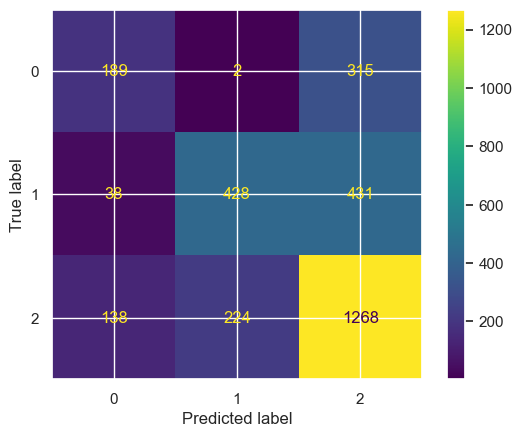

In [39]:
print(sklearn.metrics.classification_report(Y_test, predicted))
cm = sklearn.metrics.confusion_matrix(Y_test, predicted)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm).plot()